In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
from pandas import DataFrame
import seaborn as sns
from matplotlib.pyplot import figure

## Read Data

In [2]:
df = pd.read_csv("C:/Users/heera/Desktop/GLabs_DSMP_New-masters/Train.csv")
test_data=pd.read_csv("C:/Users/heera/Desktop/GLabs_DSMP_New-masters/Test.csv")
path="C:/Users/heera/Desktop/GLabs_DSMP_New-masters/Test.csv"
df.head()
test_data.head(2)

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,current,M,37,575,2795.45,1290.0,6141.05,676.50,9146.1,...,24.0,20.0,9750.0,30527.88,31271.0,3.0,12.0,25945.92,Y,1170.49
1,13541,current,M,33,394,29405.13,1640.0,1670.00,2463.92,10947.5,...,43.0,40.0,16967.0,14342.83,16582.0,6.0,39.0,12214.00,Y,16447.45


## Drop Features and corelation

In [3]:
df.describe()
df.info()
df['investment_4'] = df['investment_4'].abs()
df.drop(["personal_loan_active","vehicle_loan_active","personal_loan_closed","vehicle_loan_closed","loan_enq"],axis=1,inplace=True)
test_data['investment_4'] = test_data['investment_4'].abs()
test_data.drop(["personal_loan_active","vehicle_loan_active","personal_loan_closed","vehicle_loan_closed","loan_enq"],axis=1,inplace=True)
df.corrwith(df['cc_cons'],axis=0).sort_values(ascending=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 44 columns):
ID                       15000 non-null int64
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null int64
cc_cons_apr              15000 non-null float64
dc_cons_apr              15000 non-null float64
cc_cons_may              15000 non-null float64
dc_cons_may              15000 non-null float64
cc_cons_jun              15000 non-null float64
dc_cons_jun              15000 non-null float64
cc_count_apr             15000 non-null float64
cc_count_may             15000 non-null float64
cc_count_jun             15000 non-null float64
dc_count_apr             15000 non-null float64
dc_count_may             15000 non-null float64
dc_count_jun             15000 non-null float64
card_lim                 15000 non-null float64
personal_loan_active     15000 non-

region_code             -0.018824
credit_amount_jun       -0.013026
investment_3            -0.011453
cc_count_apr            -0.009760
age                     -0.006965
dc_count_jun            -0.006193
debit_amount_jun        -0.005573
debit_count_jun         -0.005336
emi_active              -0.004143
max_credit_amount_apr   -0.003502
card_lim                -0.003155
credit_count_apr        -0.002170
credit_amount_may       -0.002064
cc_count_jun            -0.002005
debit_count_apr         -0.001350
cc_cons_jun             -0.000900
dc_count_apr            -0.000758
dc_cons_may             -0.000642
debit_amount_may        -0.000577
debit_count_may         -0.000374
dc_cons_apr             -0.000126
dc_cons_jun              0.002863
debit_amount_apr         0.003937
investment_1             0.004086
ID                       0.004666
credit_count_jun         0.005108
credit_amount_apr        0.005293
cc_cons_apr              0.006155
dc_count_may             0.007711
max_credit_amo

In [4]:
##Remove Outliers IQR Score

In [5]:
q1 = df.quantile(0.05)  # 0.25
q3 = df.quantile(0.95)  # 0.75
iqr = q3 - q1
df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
df.head(5)

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,12780.44,96408.0


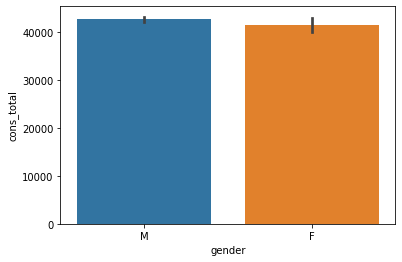

In [6]:
#Distribution of amount spent by credit card by Men and Women

df['cons_total']=df['cc_cons_apr']+df['cc_cons_may']+df['cc_cons_jun']
sns.barplot(x='gender', y='cons_total', data = df)


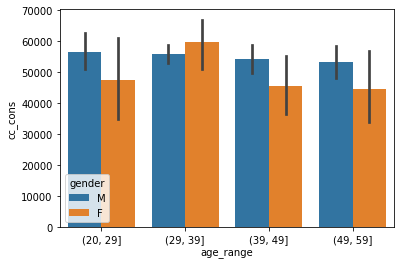

In [7]:
#Ages classified in bins and Distribution of Age ranf=ge with cc_cons
labels = ['less than 20', '20-56', '57-69','70+']
#ages['agerange'] = pd.cut(ages, bins, labels = labels,include_lowest = True)
df['age_range'] = pd.cut(x=df['age'], bins=[20, 29, 39, 49,59])
df
sns.barplot(x='age_range', y='cc_cons',hue='gender', data = df)

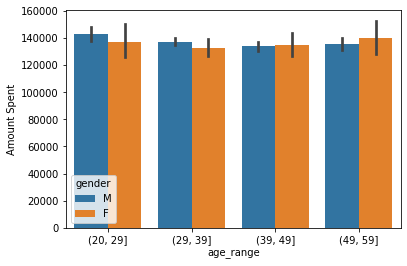

In [8]:
#Distribution of amount spent  by Men and Women classified with age
df['Amount Spent']=df['max_credit_amount_apr']+df['max_credit_amount_may']+df['max_credit_amount_jun']
sns.barplot(x='age_range', y='Amount Spent',hue='gender', data = df)

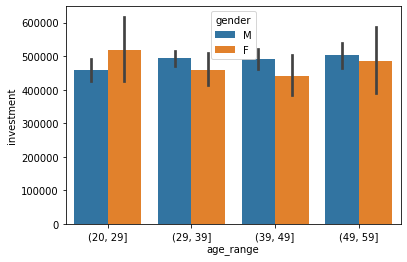

In [9]:
#Distribution of Total Investment  by Men and Women classified with age
df['investment']=df['investment_1']+df["investment_2"]+df["investment_3"]+df["investment_4"]
sns.barplot(x='age_range', y='investment',hue='gender', data = df)


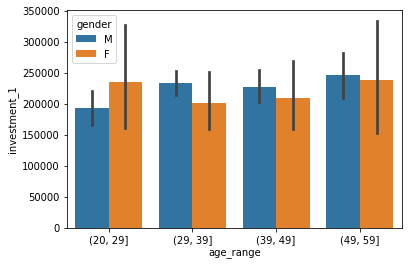

In [10]:
sns.barplot(x='age_range', y='investment_1',hue='gender', data = df)

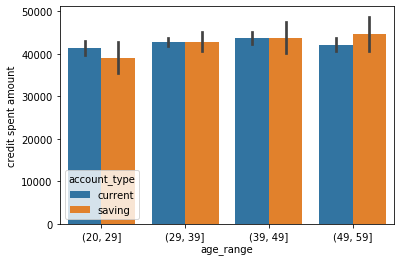

In [11]:
#Distribution of amount spent using credit card w.r.t account type
df['credit spent amount']=df['cc_cons_apr']+df['cc_cons_may']+df['cc_cons_jun']
sns.barplot(x='age_range', y='credit spent amount',hue='account_type', data = df)

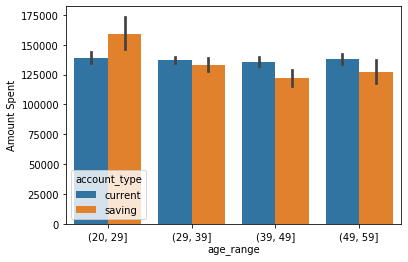

In [12]:
#Distribution of amount spent using credit card w.r.t account type
sns.barplot(x='age_range', y='Amount Spent',hue='account_type', data = df)

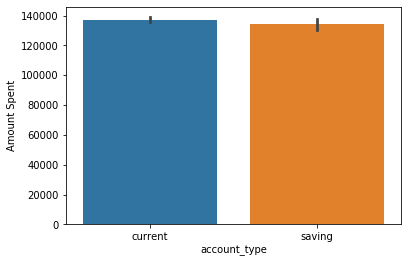

In [13]:
# #Distribution of Amount spent as per account type
df['Amount Spent']=df['max_credit_amount_apr']+df['max_credit_amount_may']+df['max_credit_amount_jun']
df.groupby(['Amount Spent','account_type'])['Amount Spent'].count()

# # sns.catplot(x='account_type_current',y='Amount Spent', kind='bar', data=df)
sns.barplot(x='account_type', y='Amount Spent', data = df)

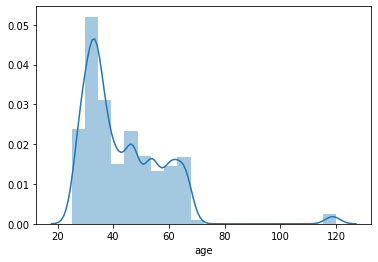

In [14]:
#Age Histogram
sns.distplot(df["age"],bins=20)

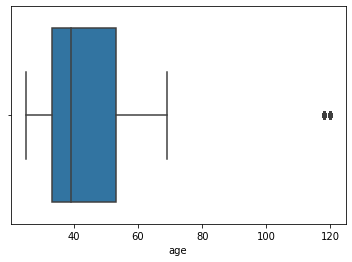

In [15]:
#Age Boxplot
sns.boxplot(df['age'])

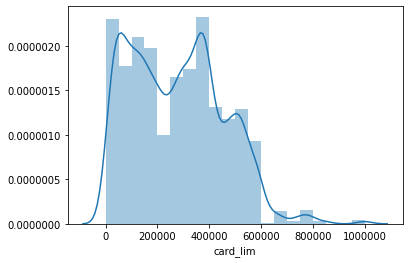

In [16]:
#Card Limit Frequesncy Distribution
sns.distplot(df["card_lim"],bins=20)


In [17]:
#which region code has highest Amount Spent using credit card but least number of transactions
df['credit spent amount']=df['cc_cons_apr']+df['cc_cons_may']+df['cc_cons_jun']
df['Debit spent amount']=df['dc_cons_apr']+df['dc_cons_may']+df['dc_cons_jun']
df['Credit Transaction Count']=df['cc_count_apr']+df['cc_count_may']+df['cc_count_jun']
df['Debit Transaction Count']=df['dc_count_apr']+df['dc_count_may']+df['dc_count_jun']
df.columns
df.groupby(['credit spent amount','region_code','Credit Transaction Count'])['credit spent amount'].count().sort_values(ascending=False)
# df['credit spent amount'].max()
df['Credit Transaction Count'].min()
#df['credit spent amount'].min()
df.groupby(['credit spent amount','region_code','Credit Transaction Count'])['credit spent amount'].count().sort_values(ascending=True)
df.groupby(['Credit Transaction Count','region_code','credit spent amount'])['Credit Transaction Count'].count().sort_values(ascending=True)

df.groupby(['Credit Transaction Count','region_code','credit spent amount'])['Credit Transaction Count'].count().sort_values(ascending=False)

#Conclusions
#Region Code 424 has maximum amount of transaction of 1161694.11 with number of Transcations using Credit card as 95( Avg ~ 12228) 
#Region Code 424 has minimum amount of transaction of 1544.870 with number of Transcations using Credit card as 192( Avg ~ 8)
#Region Code 505 has minimum number of transactions using credit which is 3 and the amount spent is 101083.040( Avg ~ 33694)
#Region Code 713 has maximum number of transactions using credit card which is 1220 and the amount spent is 66735.170( Avg ~ 55)

#Hence we can Conclude Region code 505 is richest and Region code 424 is poor

Credit Transaction Count  region_code  credit spent amount
341.0                     708          35619.030              1
65.0                      966          26686.320              1
66.0                      464          30023.000              1
                          448          38014.505              1
                                       26659.720              1
                                                             ..
112.0                     274          8652.820               1
                          270          19035.165              1
                          269          85452.750              1
                                       57586.770              1
3.0                       505          101083.040             1
Name: Credit Transaction Count, Length: 11455, dtype: int64

##Treating Ages

38.0


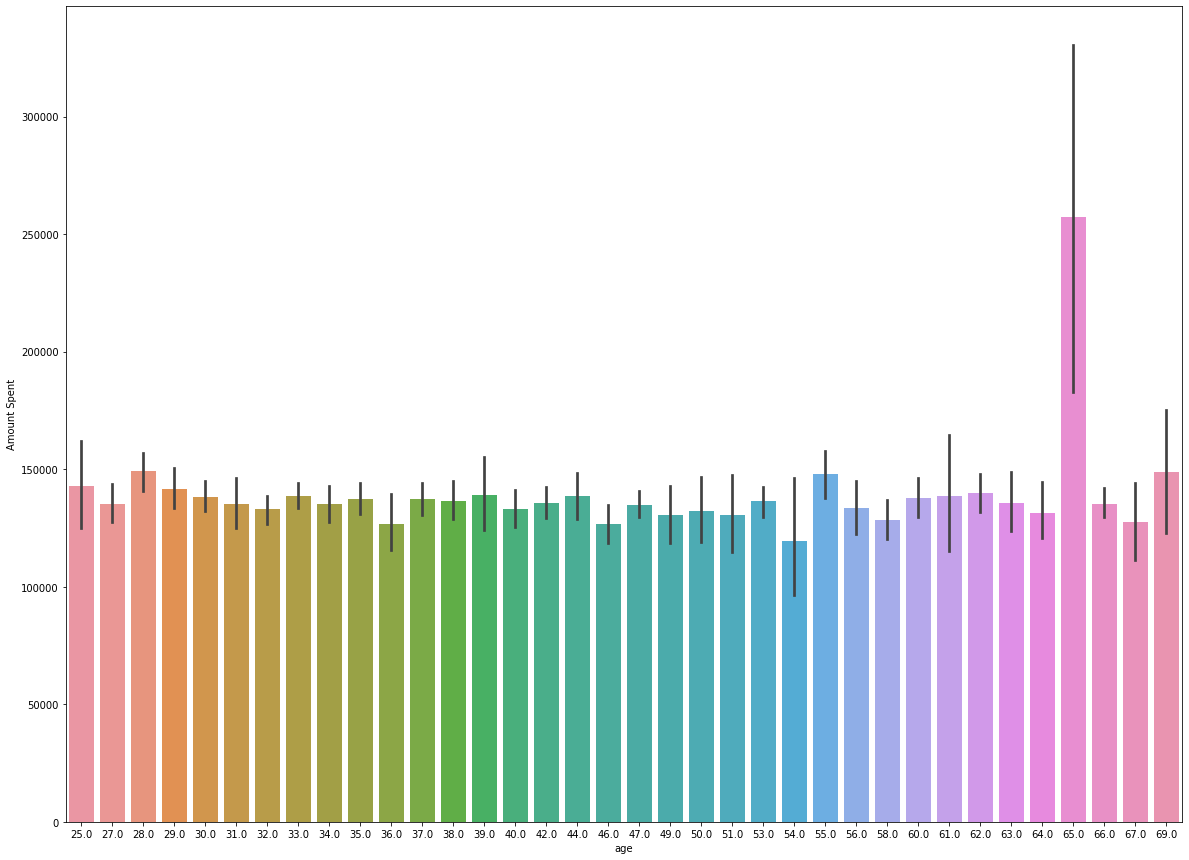

In [18]:
#Dropping Rows with Age above 120
df.drop(df[df['age'] > 120].index, inplace = True)
#test_data.drop(test_data[test_data['age'] > 120].index, inplace = True)
mode = df.loc[df.age <= 70, 'age'].median()
print(mode)
df.loc[df.age > 70, 'age'] = np.nan
df['age'].fillna(38, inplace=True)

#for feature engineering
# median = df['age'].describe()Q1 = boston_df_o1.quantile(0.25)

# print(median)
# df['age'] > 100 
# df = df['age'] > 100 .fillna(method='ffill')

plt.figure(figsize=(20,15))
sns.barplot(x='age',y='Amount Spent',data=df)


In [19]:

df['dc_cons_avg']=(df["dc_cons_jun"]+df["dc_cons_apr"]+df["dc_cons_may"])/3
test_data['dc_cons_avg']=(test_data["dc_cons_jun"]+test_data["dc_cons_apr"]+test_data["dc_cons_may"])/3
df['cc_cons_avg']=(df["cc_cons_jun"]+df["cc_cons_apr"]+df["cc_cons_may"])/3
test_data['cc_cons_avg']=(test_data["cc_cons_jun"]+test_data["cc_cons_apr"]+test_data["cc_cons_may"])/3
df['investment']=df['investment_1']+df["investment_2"]+df["investment_3"]+df["investment_4"]
df["credit_count_total"]=df["credit_count_apr"]+df["credit_count_may"]+df["credit_count_jun"]
df['debit_count_total']=df["debit_count_apr"]+df["debit_count_may"]+df["debit_count_jun"]
df["debit_amount_total"]=df["debit_amount_apr"]+df["debit_amount_may"]+df["debit_amount_jun"]
test_data["debit_amount_total"]=test_data["debit_amount_apr"]+test_data["debit_amount_may"]+test_data["debit_amount_jun"]
df["credit_amount_total"]=df["credit_amount_apr"]+df["credit_amount_may"]+df["credit_amount_jun"]